<div>
    <p style="float: right;"><img src="https://media.swipepages.com/2021/2/sirius-logo-principal-tag-1-300.png" height="80px"border="1px"></p>
    
</div>
<h1>Workshop pandas e análise de dados </h1>





Alunos: Gabriel Nunes Barbosa Nogueira

Data: 17/06/2022



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Analise Gráfica 

Olá Cientista de Dados! Tudo bem? 



Meu amigo o Dr. **Always Clean** ,veio diretamente do século  18 com o seguinte problema :

#### Olá Sou o Dr. **Always Clean**. Preciso de sua ajuda urgentemente!!

#### Estou tentando convencer meus médicos de que precisam revisar a forma de trabalho, pois percebi que muitas gestantes estão indo a óbito após o parto.
#### Será que você pode me ajudar a convencê-los?

##### Obrigado pela ajuda! Seus conhecimentos de análise de dados serão valiosos!

Eu compilei os dados em anuais: "obitos_anuais_por_clinica.csv"

e mensais : obitos_mensais.csv

1 -Você poderia dar uma olhada nos dados anuais que eu coletei?

In [3]:
import pandas as pd
import numpy as np


# obitos por clinica(anual)
obitos_ano = pd.read_csv('/content/drive/MyDrive/SIRIUS/Dados/obitos_anuais_por_clinica.csv')
obitos_ano.head()



,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1


Para te ajudar a entender melhor oohh *"meu grande amigo cientista de dados"*, as 4 colunas são:

- year: ano
- births: nascimento do bebe
- deaths: óbitos das mães
- clinic: clinica que a mãe foi atendida( 1 ou 2)

Notou algo diferente?

Mostrei esses dados para os médicos pois desconfiava que o problema se agravava em uma das **clínicas**. Parecia haver mais óbitos em uma clinica do que em outra, mas não estou conseguindo demonstrar. Você tem alguma ideia?

Pensei em calcular o número total de óbitos de cada clínica... mas será que estaria sendo justo? E se a clínica que tem mais óbitos também tem mais nascimentos?

2 - Veja as informações básicas desses dados!

In [4]:
obitos_ano.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    12 non-null     int64 
 1   births  12 non-null     int64 
 2   deaths  12 non-null     int64 
 3   clinic  12 non-null     object
dtypes: int64(3), object(1)
memory usage: 512.0+ bytes


3 - Em qual ano, segundo os dados tiveram mais nascimentos na clinica 1

In [5]:
obitos_ano.columns

Index(['year', 'births', 'deaths', 'clinic'], dtype='object')

In [6]:
obitos_ano[obitos_ano.clinic=='clinic 1'].sort_values('births',ascending=False).iloc[0,0]


1846

4 - Qual ano tiveram menos óbitos na clinica 2

In [7]:
obitos_ano[obitos_ano.clinic=='clinic 2'].sort_values('deaths',ascending=True).iloc[0,0]

1845

5 - Você poderia acrescentar uma coluna com a proporção de óbitos das mães por nascimento?

In [8]:
obitos_ano[:5]

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1


In [ ]:
obitos_ano['']

In [ ]:
obitos_ano['prop nascimento']=round((obitos_ano['deaths']/obitos_ano['births'])*100,2)
obitos_ano.head()


,year,births,deaths,clinic,prop nascimento
0,1841,3036,237,clinic 1,7.81
1,1842,3287,518,clinic 1,15.76
2,1843,3060,274,clinic 1,8.95
3,1844,3157,260,clinic 1,8.24
4,1845,3492,241,clinic 1,6.90


6 - Você conseguiu observar alguma diferença entre as clínicas? Explique como chegou a conclusão!!!

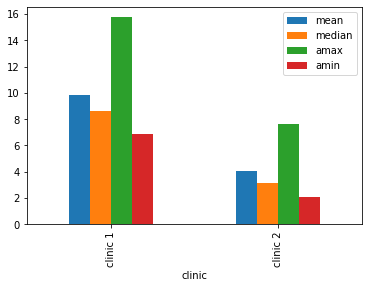

In [ ]:
obitos_ano.groupby('clinic')['prop nascimento'].agg([np.mean,np.median,np.max,np.min]).plot(kind='bar')

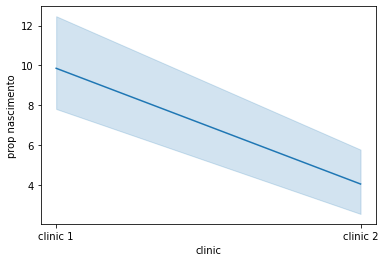

In [ ]:
sns.lineplot(data=obitos_ano,x='clinic',y='prop nascimento')

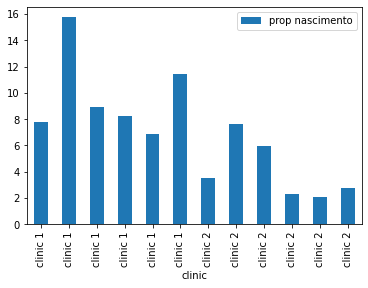

In [ ]:
obitos_ano[['clinic','prop nascimento']].plot(x='clinic',y='prop nascimento',kind='bar')

A clinica 1 tem mais óbitos por nascimentos do que a clinica 2!!!!!!!!

Uau! A conclusão que você chegou foi sensacional!  Eu também percebi isso, mas não tinha mostrado da forma genial que você mostrou!

Por que será que a proporção de mortes é sempre muito maior numa clinica do que na outra? O que você acha?



Bom, tenho uma informação que eu ainda não tinha te falado.
Sabe, tenho muitos estudantes de medicina que serviam numa clinica(nessa com maior óbitos), enquanto a maioria dos médicos já com algum tempo de profissão atuavam na outra clínica

Por isso fiz mais um teste, resolvi colocar apenas médicos experientes a partir de determinado período na clinica de maior óbito por recem nascido. 

Os dados mensais com esses dados de antes e depois de alocar os médicos experientes estão no arquivo "obitos_mensais.csv"

7 - Vamos explorar esses dados? Veja as primeiras linhas!

###




In [ ]:
# Os dados já estão aqui da clinica 1 junto com os dados novos
obt_mensais='/content/drive/MyDrive/SIRIUS/Dados/obitos_mensais.csv'
mensal_clinica_1 = pd.read_csv(obt_mensais, parse_dates=["date"])
mensal_clinica_1[:5]


,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2


8 - Qual mês/ano tiveram menos obitos?

In [ ]:
mensal_clinica_1.sort_values('deaths').iloc[0]

date      1848-03-01 00:00:00
births                    276
deaths                      0
Name: 85, dtype: object

9-  Qual mês/ano tivemos mais óbitos?

In [ ]:
mensal_clinica_1.sort_values(by=['deaths'],ascending=False).iloc[0,0]


Timestamp('1842-12-01 00:00:00')

11 - Legal o que você fez até agora, porém os dados estão em números absolutos. Você poderia fazer novamente aquela cálculo de óbitos por nascimentos que você fez no exercício 5?

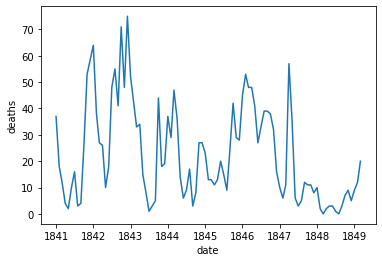

In [ ]:
sns.lineplot(data=mensal_clinica_1,x='date',y='deaths')

In [ ]:
mensal_clinica_1['Prop mortes/nascimentos']=round((mensal_clinica_1['deaths']/mensal_clinica_1['births'])*100,2)
mensal_clinica_1.head()

,date,births,deaths,Prop mortes/nascimentos
0,1841-01-01,254,37,14.57
1,1841-02-01,239,18,7.53
2,1841-03-01,277,12,4.33
3,1841-04-01,255,4,1.57
4,1841-05-01,255,2,0.78


12 - Use o seaborn e o metodo lineplot para fazer um grafico de linhas de "date" x "proporcao_de_obitos"

Você consegue observar algo diferente?

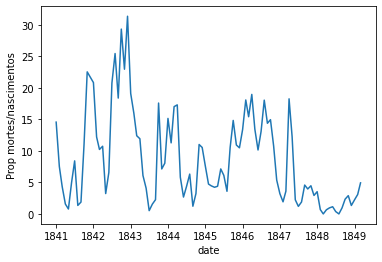

In [ ]:
import seaborn as sns
sns.lineplot(data=mensal_clinica_1,x='date',y='Prop mortes/nascimentos')


12 - A data da troca dos médicos ocorreu em  06/1847! Agora olhe o gráfico novamente

13 - No código abaixo foi definido  a data de troca usando o método *to_datetime* do pandas e foi nomeada como inicio_troca!

Além disso foi criado a coluna **troca** usando a condição: 
Se a data for menor que inicio_troca então chame de 'antes da troca', 
senão chame de 'apos a troca'.

Para isso foi usado o numpy e o método "where". Você lembra desse where do curso de SQL?

In [ ]:
# Data da troca de medicos foi exatamente nessa data
inicio_troca = pd.to_datetime('1847-06-01')


mensal_clinica_1['troca']=np.where(mensal_clinica_1['date']<inicio_troca , 'antes da troca', 'apos a troca')


14 - Agora você poderia fazer o gráfico de linhas novamente levando em conta agora a coluna 'troca'

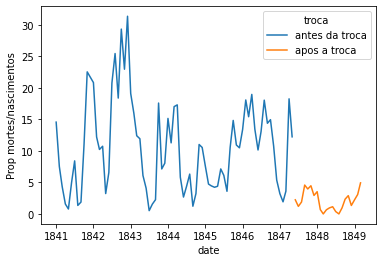

In [ ]:
sns.lineplot(x='date', y='Prop mortes/nascimentos', hue='troca', data=mensal_clinica_1)

Que gráfico sensacional. Com esse gráfico fica impossível não concordar que os médicos inexperientes estavam de alguma forma causando mais óbitos pois em 06/1847 ocorreu a troca dos médicos!!!
Obrigado por sua ajuda.!!

15 - Para encerrar, poderia fazer um boxplot da proporção de óbitos antes e depois da troca de médicos?

In [ ]:
mensal_clinica_1

,date,births,deaths,Prop mortes/nascimentos,troca
0,1841-01-01,254,37,14.57,antes da troca
1,1841-02-01,239,18,7.53,antes da troca
2,1841-03-01,277,12,4.33,antes da troca
3,1841-04-01,255,4,1.57,antes da troca
4,1841-05-01,255,2,0.78,antes da troca
...,...,...,...,...,...
93,1848-11-01,310,9,2.90,apos a troca
94,1848-12-01,373,5,1.34,apos a troca
95,1849-01-01,403,9,2.23,apos a troca
96,1849-02-01,389,12,3.08,apos a troca


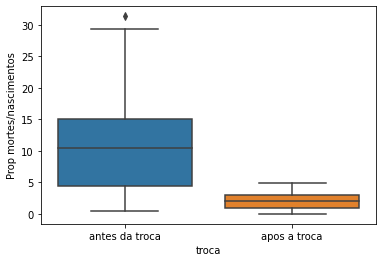

In [ ]:
sns.boxplot(data=mensal_clinica_1,x='troca',y='Prop mortes/nascimentos')

Uau! Ficou mais claro ainda, não é?
Mais médicos experientes,parecem que se relacionam menos mortes!! Será que essa hipótese é verdadeira?

Para responder isso, precisamos da estatística!!! Ela é a linguagem usada pela ciência para testar hipóteses sobre dados!
Mas isso você verá nos próximos cursos!!

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=867c0c84-8b7e-40cb-97b6-886b437d8e46' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>